In this notebook I will start by loading the datasets, exploring them and preparing them for analysis. Then I will start looking into the basic client characteristics.

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading dataset

In [2]:
filepath1 = '../Data/df_final_demo.txt' # Client Profiles
filepath2 = '../Data/df_final_web_data_pt_1.txt' # Digital Footprints, part 1
filepath3 = '../Data/df_final_web_data_pt_2.txt' # Digital Footprints, part 2
filepath4 = '../Data/df_final_experiment_clients.txt' # Experiment Roster 

df_clients = pd.read_csv(filepath1)
df_trace_1 = pd.read_csv(filepath2)
df_trace_2 = pd.read_csv(filepath3)
df_roster = pd.read_csv(filepath4)

In [3]:
# Merging part 1 and 2 of Digital Footprints
df_trace = pd.concat([df_trace_1, df_trace_2], axis=0)

In [4]:
df_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
df_trace.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [6]:
df_roster.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


# Data cleaning

### Null values

In [7]:
print(f'The dataset df_clients has the following null values:\n\n{df_clients.isna().sum()}')

The dataset df_clients has the following null values:

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [8]:
print(f'The dataset df_roster has null values, for the clients that belong neither to Test nor to Control group:\n\n{df_roster.isna().sum()}')

The dataset df_roster has null values, for the clients that belong neither to Test nor to Control group:

client_id        0
Variation    20109
dtype: int64


The null values in the Variation column are for the clients that belong to none of the groups of the A/B testing. I will fill in the null values with 'Undefined'.

In [9]:
# Replacing the null values at df_roster with "Undefined"
df_roster["Variation"] = df_roster["Variation"].apply(str).replace('nan','Undefined')

In [10]:
print(f'The dataset df_trace has no null values:\n\n{df_trace.isna().sum()}')

The dataset df_trace has no null values:

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


### Duplicated values

In [11]:
print(f'The duplicated values for the dataset df_clients are: {df_clients.duplicated().sum()}\n'
      f'The duplicated values for the dataset df_roster are: {df_roster.duplicated().sum()}\n'
f'The duplicated values for the dataset df_trace are: {df_trace.duplicated().sum()}\n')

The duplicated values for the dataset df_clients are: 0
The duplicated values for the dataset df_roster are: 0
The duplicated values for the dataset df_trace are: 10764



In [12]:
# Dropping he duplicated values at the df_trace
df_trace = df_trace.drop_duplicates()

### Formatting

In [13]:
print(f'For the dataset df_clients here are the dtypes of the columns: \n\n{df_clients.dtypes}')

For the dataset df_clients here are the dtypes of the columns: 

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object


In [14]:
print(f'For the dataset df_roster here are the dtypes of the columns: \n\n{df_roster.dtypes}')

For the dataset df_roster here are the dtypes of the columns: 

client_id     int64
Variation    object
dtype: object


I will format the columns as lowercase to match the other datasets.

In [15]:
df_roster.columns = df_roster.columns.map(str.lower)

In [16]:
print(f'For the dataset df_trace here are the dtypes of the columns: \n\n{df_trace.dtypes}')

For the dataset df_trace here are the dtypes of the columns: 

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object


Making the date_time column in datetime.

In [17]:
df_trace['date_time'] = pd.to_datetime(df_trace['date_time'],format='%Y-%m-%d %H:%M:%S')

# Clients' profile

### Clients' age

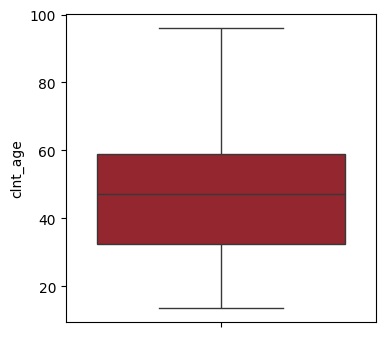

In [18]:
# Box plot with client's age
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_clients['clnt_age'], color='#A5141F')
plt.show()

We observe from the boxplot that the clients' age doesn't have outliers.

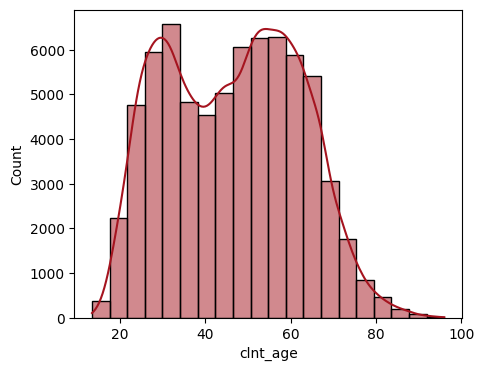

In [19]:
# Histogram with client's age
plt.figure(figsize=(5, 4))
sns.histplot(df_clients['clnt_age'], kde=True, bins=20, color='#A5141F')
plt.show()

For better clarity, I will create age brackets to communicate more clearly the age characteristics.

In [20]:
# Creating age brackets
bins = [0, 18.0, 25.0, 35.0, 45.0, 55.0, 65.0 , 75.0, 85.0, df_clients['clnt_age'].max()]
labels = ['Under 18 year', '18-24 years', '25-34 years', '35-44 years', '45-54 years', 
          '55-64 years', '65-74 years', '75-84 years', '85 years and older']

df_clients['clnt_age_category'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels, include_lowest=True)


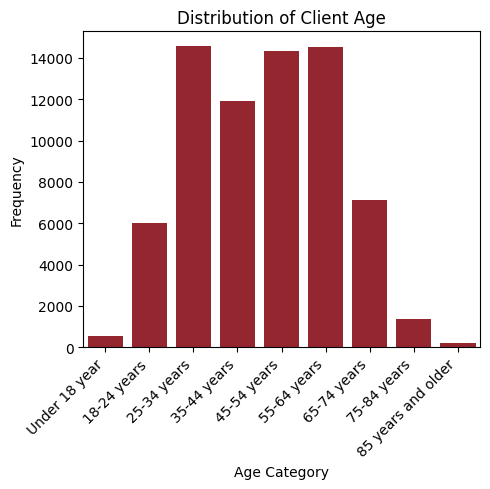

In [21]:
plt.figure(figsize=(5, 5)) 

sns.countplot(data=df_clients, x='clnt_age_category', color='#A5141F', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Distribution of Client Age')

# Save plot as PNG
plt.tight_layout() 
#plt.savefig('client_age_category.png')

plt.show()

It's notable that the clients predominantly fall into two age groups: 25-34 years and 45-64 years. Moreover, the interquartile range (IQR) reinforces this observation, spanning from 32 to 59 years, indicating that the majority of clients are concentrated within this age range.

### Clients' tenure years

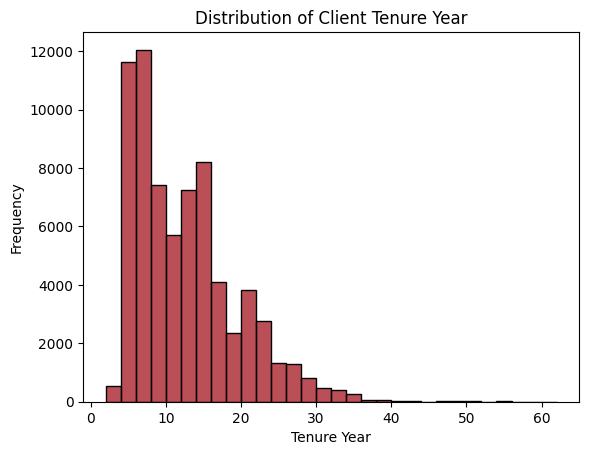

In [22]:
# Histogram with client's tenure years
sns.histplot(df_clients['clnt_tenure_yr'],  bins=30, color='#A5141F')

plt.xlabel('Tenure Year')
plt.ylabel('Frequency')
plt.title('Distribution of Client Tenure Year')

# Save plot as PNG
#plt.savefig('client_tenure_histogram.png')

plt.show()

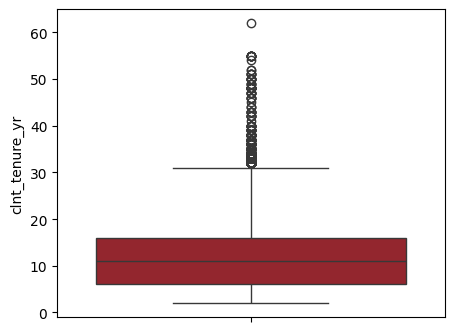

In [23]:
# Box plot with client's tenure years
plt.figure(figsize=(5, 4))
sns.boxplot(data=df_clients['clnt_tenure_yr'], color='#A5141F')
plt.show()

The distribution of client tenure years is right skewed, and appears to have outliers with higher values. Although outliers are present, in the analysis they will be considered normal, since in the context of an investment management company there can be as long-term clients. The majority of clients have tenures ranging from approximately 6 to 16 years, as indicated by the interquartile range (IQR).

### Client's gender

<Axes: xlabel='gendr', ylabel='count'>

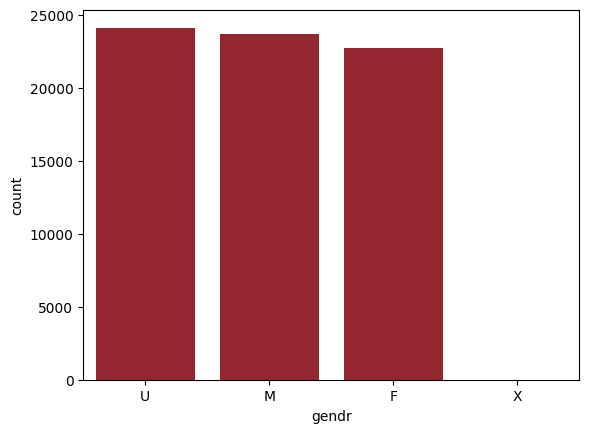

In [24]:
sns.countplot(data=df_clients, x='gendr', color='#A5141F', legend=False)

Based on the available data, excluding the unknown gender entries (including "U" and "X"), there appears to be a relatively balanced distribution between male and female clients.

### Clients' account balance

In [25]:
df_clients.bal.describe().apply(lambda x: f"{x:,.0f}")

count        70,595
mean        147,445
std         301,509
min          13,789
25%          37,347
50%          63,333
75%         137,545
max      16,320,040
Name: bal, dtype: object

### Interaction with company via call/ platform visit

<Axes: xlabel='calls_6_mnth', ylabel='count'>

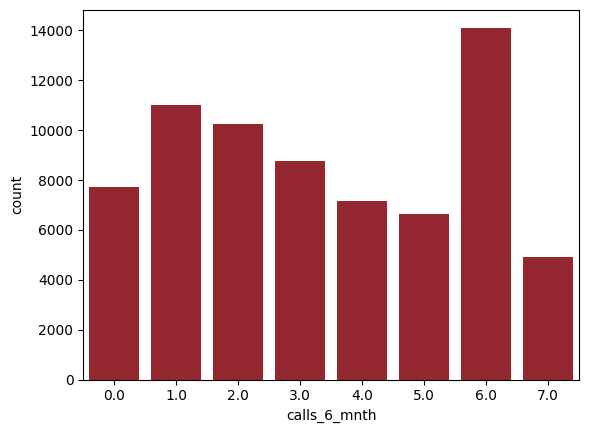

In [26]:
sns.countplot(data=df_clients, x='calls_6_mnth', color='#A5141F', legend=False)

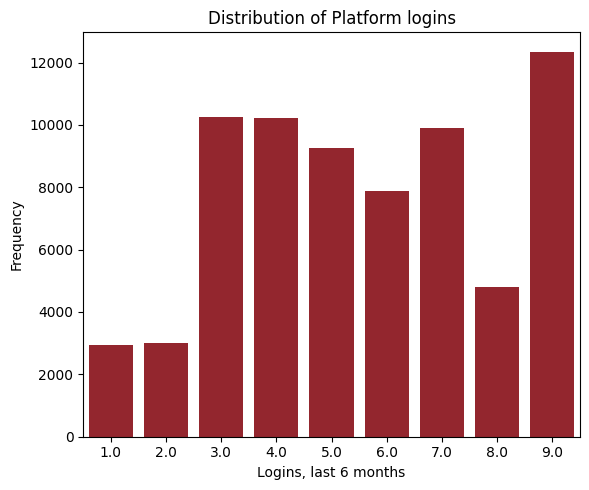

In [27]:
plt.figure(figsize=(6, 5)) 
sns.countplot(data=df_clients, x='logons_6_mnth', color='#A5141F', legend=False)

plt.xlabel('Logins, last 6 months')
plt.ylabel('Frequency')
plt.title('Distribution of Platform logins')

# Save plot as PNG
plt.tight_layout() 
plt.savefig('client_platform_logins.png')

plt.show()

The vast majority of the clients had some interaction with the company via call or platform visit the last 6 months.

# Exporting cleaned files

In [28]:
# df_clients.to_csv('../data/df_clients_CLEANED.csv', index=False)
# df_trace.to_csv('../data/df_trace_CLEANED.csv', index=False)
# df_roster.to_csv('../data/df_roster_CLEANED.csv', index=False)